In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, recall_score, precision_score
import joblib
import os
import sys

import warnings
warnings.filterwarnings('ignore')

# CẤU HÌNH

In [2]:
# Cấu hình đường dẫn đầu vào/đầu ra
base_path = os.getcwd()
input_folder = os.path.join(base_path, 'folder_standardized')
models_folder = os.path.join(base_path, 'models_and_results')
output_folder = os.path.join(base_path, 'models_and_results')

print("--- KHỞI TẠO MODEL COMPARISON ---")

--- KHỞI TẠO MODEL COMPARISON ---


# LOAD DATA

In [3]:
def load_test_data():
    """
    Đọc dữ liệu Test từ folder_standardized (kết quả của processing.ipynb).
    
    Returns:
        tuple: (X_test, y_test) - Dữ liệu Test để đánh giá mô hình
        
    Raises:
        FileNotFoundError: Nếu không tìm thấy dữ liệu Test
    """
    print("\n1. LOAD TEST DATA")
    try:
        X_test = pd.read_csv(os.path.join(input_folder, 'X_test.csv'))
        y_test = pd.read_csv(os.path.join(input_folder, 'y_test.csv')).values.ravel()
        
        print(f"   - Đọc dữ liệu Test thành công")
        print(f"   - X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
        return X_test, y_test
    except FileNotFoundError:
        print("   - Lỗi: Không tìm thấy dữ liệu Test. Hãy chạy processing.ipynb trước!")
        sys.exit()

X_test, y_test = load_test_data()


1. LOAD TEST DATA
   - Đọc dữ liệu Test thành công
   - X_test shape: (1405, 34), y_test shape: (1405,)


# LOAD MODELS

In [4]:
def load_all_models():
    """
    Tải ba mô hình đã huấn luyện từ thư mục models_and_results.
    
    Các mô hình bao gồm: LogisticRegression, RandomForest, XGBoost
    
    Returns:
        dict: Từ điển {model_name: trained_model} chứa cả 3 mô hình
        
    Raises:
        FileNotFoundError: Nếu chưa train đủ 3 mô hình
    """
    print("\n2. LOAD TRAINED MODELS")
    
    model_names = ['LogisticRegression', 'RandomForest', 'XGBoost']
    models = {}
    
    try:
        for name in model_names:
            model_path = os.path.join(models_folder, f'{name}.pkl')
            models[name] = joblib.load(model_path)
            print(f"   - Đã tải model: {name}")
        
        print(f"   - Đã tải xong cả 3 models")
        return models
    except FileNotFoundError as e:
        print(f"   - Lỗi: Chưa train đủ 3 models. Hãy chạy các file training trước!")
        sys.exit()

models = load_all_models()


2. LOAD TRAINED MODELS
   - Đã tải model: LogisticRegression
   - Đã tải model: RandomForest
   - Đã tải model: XGBoost
   - Đã tải xong cả 3 models


# BIỂU ĐỒ 1: SO SÁNH ACCURACY & F1-SCORE


3. VISUALIZE MODEL COMPARISON: ACCURACY & F1-SCORE


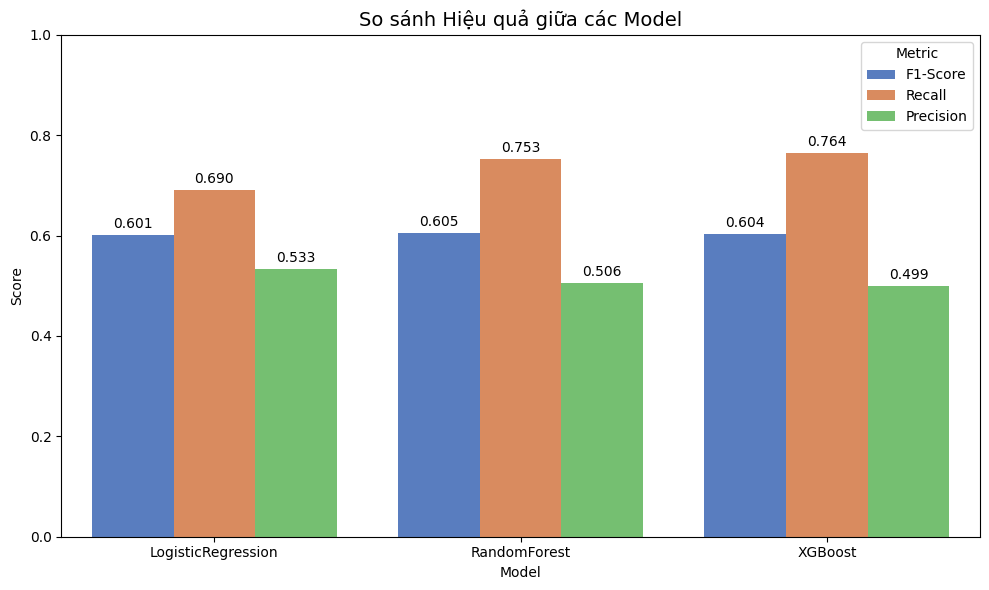

   - Lưu biểu đồ tại: d:\PROJECT\PYTHON\ml\Project_Cuoi_Ki\models_and_results\Final_Model_Comparison_Bar.png


In [5]:
def plot_accuracy_f1_comparison(models, X_test, y_test):
    """
    Vẽ biểu đồ so sánh Accuracy và F1-Score của 3 mô hình.
    
    Biểu đồ cột nhóm (Grouped Bar Chart) giúp dễ so sánh 
    hai chỉ số hiệu suất trên 3 mô hình.
    
    Args:
        models (dict): Từ điển chứa 3 mô hình đã huấn luyện
        X_test (DataFrame): Dữ liệu Test
        y_test (ndarray): Nhãn Test thực tế
    """
    print("\n3. VISUALIZE MODEL COMPARISON: ACCURACY & F1-SCORE")
    
    # Tính toán Accuracy và F1-Score cho mỗi mô hình
    results = []
    for name, model in models.items():
        y_pred = model.predict(X_test)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results.append({'Model': name, 'Metric': 'F1-Score', 'Score': f1})
        results.append({'Model': name, 'Metric': 'Recall', 'Score': recall})
        results.append({'Model': name, 'Metric': 'Precision', 'Score': precision})
    
    df_res = pd.DataFrame(results)
    
    # Vẽ biểu đồ cột nhóm
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_res, palette='muted')
    plt.title('So sánh Hiệu quả giữa các Model', fontsize=14)
    plt.ylim(0, 1.0)  # Giới hạn trục Y từ 0 đến 1 (vì là score)
    
    # Hiển thị giá trị số trên mỗi cột
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)
    
    plt.tight_layout()
    
    # Lưu biểu đồ
    save_path = os.path.join(output_folder, 'Final_Model_Comparison_Bar.png')
    plt.savefig(save_path, dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    
    print(f"   - Lưu biểu đồ tại: {save_path}")

plot_accuracy_f1_comparison(models, X_test, y_test)

# BIỂU ĐỒ 2: ROC CURVE (ĐƯỜNG CONG ROC)


4. VISUALIZE MODEL COMPARISON: ROC CURVE
   - LogisticRegression: AUC = 0.8362
   - RandomForest: AUC = 0.8410
   - XGBoost: AUC = 0.8458


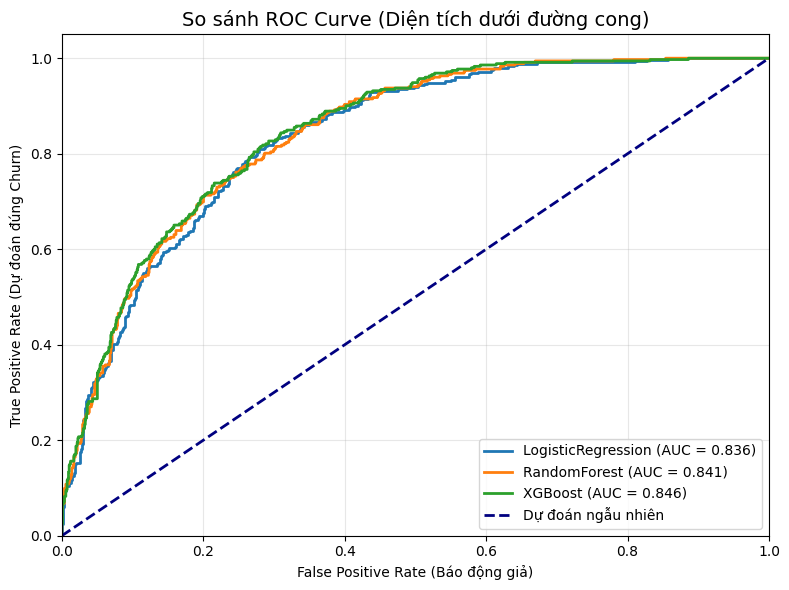

   - Lưu biểu đồ tại: d:\PROJECT\PYTHON\ml\Project_Cuoi_Ki\models_and_results\Final_ROC_Curve.png


In [6]:
def plot_roc_curves(models, X_test, y_test):
    """
    Vẽ đường cong ROC (Receiver Operating Characteristic) của 3 mô hình.
    
    ROC Curve giúp so sánh hiệu suất mô hình ở các ngưỡng phân loại khác nhau.
    Diện tích dưới đường cong (AUC) càng lớn (gần 1.0) càng tốt.
    AUC = 0.5 nghĩa là mô hình dự đoán ngẫu nhiên (đường chéo).
    
    Args:
        models (dict): Từ điển chứa 3 mô hình đã huấn luyện
        X_test (DataFrame): Dữ liệu Test
        y_test (ndarray): Nhãn Test thực tế
    """
    print("\n4. VISUALIZE MODEL COMPARISON: ROC CURVE")
    
    plt.figure(figsize=(8, 6))
    
    # Vẽ đường cong ROC cho mỗi mô hình
    for name, model in models.items():
        # Lấy xác suất dự đoán cho class=1 (Churn)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # Tính FPR (False Positive Rate) và TPR (True Positive Rate)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Vẽ đường cong
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
        print(f"   - {name}: AUC = {roc_auc:.4f}")
    
    # Vẽ đường chéo (Baseline = dự đoán ngẫu nhiên)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Dự đoán ngẫu nhiên')
    
    # Định dạng biểu đồ
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (Báo động giả)')
    plt.ylabel('True Positive Rate (Dự đoán đúng Churn)')
    plt.title('So sánh ROC Curve (Diện tích dưới đường cong)', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    
    # Lưu biểu đồ
    save_path = os.path.join(output_folder, 'Final_ROC_Curve.png')
    plt.savefig(save_path, dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    
    print(f"   - Lưu biểu đồ tại: {save_path}")

plot_roc_curves(models, X_test, y_test)

# BIỂU ĐỒ 3: PHÂN PHỐI XÁC SUẤT DỰ ĐOÁN


5. VISUALIZE RISK DISTRIBUTION (BEST MODEL)
   - Xác suất trung bình: 0.4028
   - Độ lệch chuẩn: 0.2781


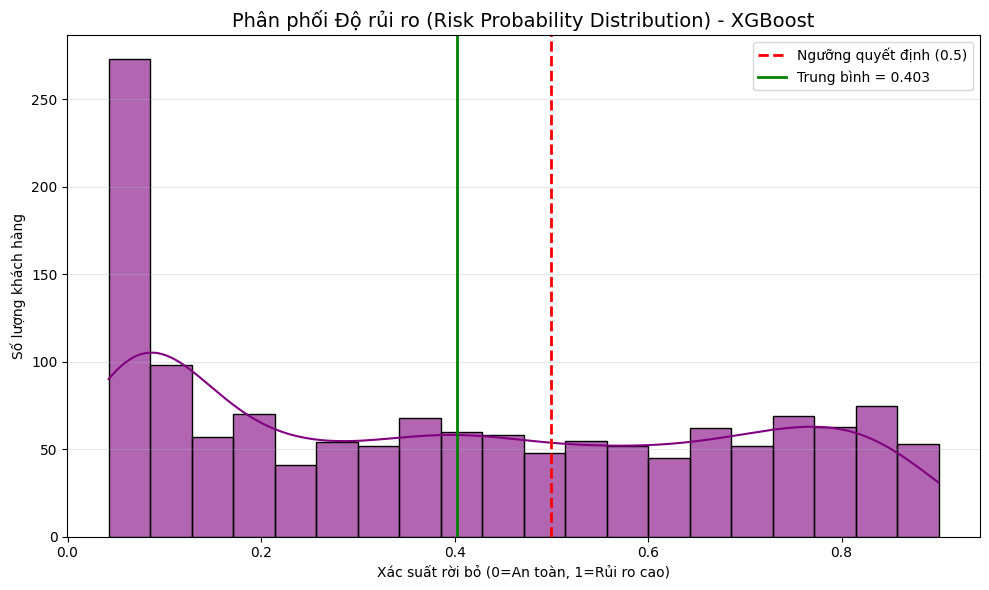

   - Lưu biểu đồ tại: d:\PROJECT\PYTHON\ml\Project_Cuoi_Ki\models_and_results\Final_Risk_Distribution.png

--- HOÀN THÀNH MODEL COMPARISON ---


In [7]:
def plot_risk_distribution(models, X_test):
    """
    Vẽ biểu đồ phân phối độ rủi ro (Risk Probability Distribution) của mô hình tốt nhất.
    
    Histogram hiển thị phân bố xác suất dự đoán của khách hàng:
    - Gần 0: Khách hàng an toàn (ít khả năng rời bỏ)
    - Gần 1: Khách hàng rủi ro cao (khả năng rời bỏ cao)
    
    Chọn mô hình XGBoost (hiệu suất tốt nhất) để phân tích.
    
    Args:
        models (dict): Từ điển chứa 3 mô hình đã huấn luyện
        X_test (DataFrame): Dữ liệu Test
    """
    print("\n5. VISUALIZE RISK DISTRIBUTION (BEST MODEL)")
    
    # Chọn mô hình XGBoost (có hiệu suất tốt nhất)
    best_model = models['XGBoost']
    y_prob_best = best_model.predict_proba(X_test)[:, 1]
    
    # Tính thống kê
    mean_prob = np.mean(y_prob_best)
    std_prob = np.std(y_prob_best)
    
    # Vẽ histogram với KDE (Kernel Density Estimation)
    plt.figure(figsize=(10, 6))
    sns.histplot(data=y_prob_best, bins=20, kde=True, color='purple', alpha=0.6)
    
    # Định dạng biểu đồ
    plt.title('Phân phối Độ rủi ro (Risk Probability Distribution) - XGBoost', fontsize=14)
    plt.xlabel('Xác suất rời bỏ (0=An toàn, 1=Rủi ro cao)')
    plt.ylabel('Số lượng khách hàng')
    
    # Thêm đường ngưỡng quyết định (mặc định 0.5)
    plt.axvline(0.5, color='red', linestyle='--', linewidth=2, label='Ngưỡng quyết định (0.5)')
    
    # Thêm đường trung bình
    plt.axvline(mean_prob, color='green', linestyle='-', linewidth=2, label=f'Trung bình = {mean_prob:.3f}')
    
    plt.legend()
    plt.grid(alpha=0.3, axis='y')
    
    print(f"   - Xác suất trung bình: {mean_prob:.4f}")
    print(f"   - Độ lệch chuẩn: {std_prob:.4f}")
    
    plt.tight_layout()
    
    # Lưu biểu đồ
    save_path = os.path.join(output_folder, 'Final_Risk_Distribution.png')
    plt.savefig(save_path, dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    
    print(f"   - Lưu biểu đồ tại: {save_path}")
    print("\n--- HOÀN THÀNH MODEL COMPARISON ---")

plot_risk_distribution(models, X_test)